**Title: Wine dataset KNN Algorithm with Feature Selection**

**Description:**
This Jupyter Notebook, titled "Wine dataset KNN Algorithm with Feature Selection," focuses on classifying wine types using the K-Nearest Neighbors (KNN) algorithm while incorporating feature selection techniques. The notebook aims to build an efficient and accurate classification model by selecting the most relevant features from the wine dataset.

**Key Components:**

1. **Data Loading and Preprocessing:**
   - Loading the wine dataset containing attributes such as acidity, alcohol content, and wine type (e.g., red, white).
   - Preprocessing steps including handling missing values, encoding categorical variables, and scaling numerical features to ensure compatibility with the KNN algorithm.

2. **Exploratory Data Analysis (EDA):**
   - Exploring the dataset's characteristics, distributions of features, and relationships between variables to gain insights into the data before modeling.

3. **Feature Selection Techniques:**
   - Implementing feature selection methods such as univariate feature selection and  feature importance analysis to identify the most informative features for wine type classification.

4. **Model Training:**
   - Utilizing the scikit-learn library to train a KNN classifier on the wine dataset, incorporating the selected features.

5. **Model Evaluation:**
   - Evaluating the KNN model's performance using metrics like accuracy, precision, recall, and F1-score to assess its effectiveness in classifying wine types.

6. **Parameter Tuning:**
   - Tuning the hyperparameters of the KNN algorithm, such as the number of neighbors (k), to optimize model performance.

7. **Conclusion and Next Steps:**
   - Summarizing the findings from the analysis, including the impact of feature selection on model performance and the effectiveness of the KNN algorithm for wine classification.
   - Providing suggestions for further analysis or improvements, such as exploring different feature selection techniques or experimenting with alternative classification algorithms.

**Dependencies:**
- Python 3.x
- Jupyter Notebook
- scikit-learn
- Pandas
- NumPy
- Matplotlib
- Seaborn

**Note:**
This notebook serves as a comprehensive guide to building a wine classification model using the KNN algorithm, integrating feature selection techniques to improve model efficiency and accuracy. It aims to be a practical resource for data scientists and enthusiasts interested in classification algorithms and wine analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfwi = pd.read_csv(r"Wine.csv")

In [3]:
dfwi

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
#Checkig correlation 

In [5]:
corr = dfwi.corr()

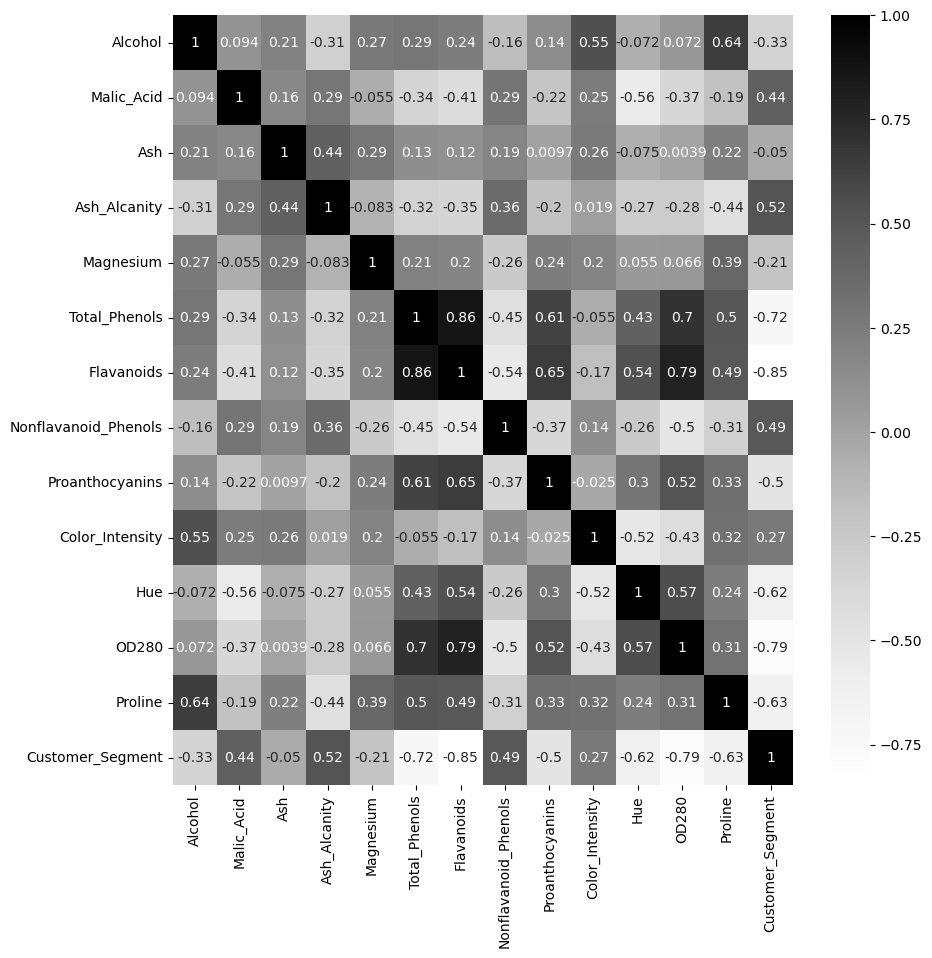

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap="Greys",annot=True)
plt.show()

In [7]:
dfwi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
#sampling

In [9]:
from sklearn.model_selection import train_test_split
dfwi_train,dfwi_test = train_test_split(dfwi,test_size=.25)

In [10]:
dfwi_train_x = dfwi_train.iloc[:,0:13] 
dfwi_train_y = dfwi_train.iloc[:,13] 

In [11]:
dfwi_test_x = dfwi_test.iloc[:,0:13] 
dfwi_test_y = dfwi_test.iloc[:,13] 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
#feature importances

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tr = DecisionTreeClassifier()

In [17]:
tr.fit(dfwi_train_x,dfwi_train_y)

DecisionTreeClassifier()

In [18]:
tr.feature_importances_

array([0.0052521 , 0.        , 0.        , 0.        , 0.01715686,
       0.        , 0.04419234, 0.        , 0.06318466, 0.06269454,
       0.        , 0.36956902, 0.43795047])

In [19]:
np.set_printoptions(threshold=np.inf)

In [20]:
tr.feature_importances_.sum()

1.0

In [21]:
dfwi_train_x.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [22]:
feature_importances = pd.DataFrame({"Feature":dfwi_train_x.columns,"Importances":tr.feature_importances_})

In [23]:
feature_importances

,Feature,Importances
0,Alcohol,0.005252
1,Malic_Acid,0.000000
2,Ash,0.000000
3,Ash_Alcanity,0.000000
4,Magnesium,0.017157
5,Total_Phenols,0.000000
6,Flavanoids,0.044192
7,Nonflavanoid_Phenols,0.000000
8,Proanthocyanins,0.063185
9,Color_Intensity,0.062695


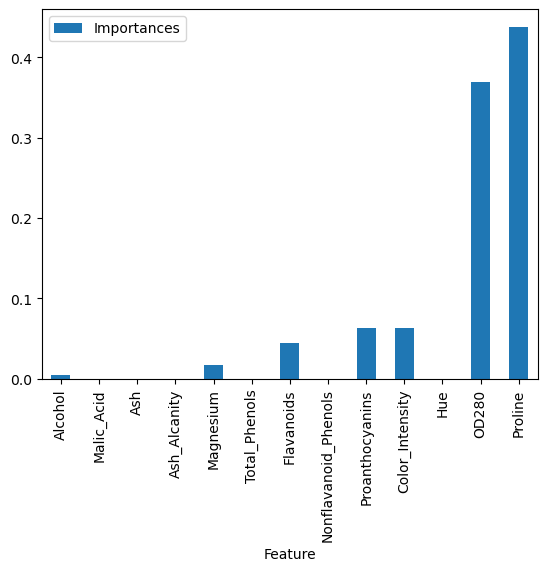

In [24]:
feature_importances.plot(x="Feature",y="Importances",kind="bar")
plt.show()

In [25]:
feature_importances.sort_values("Importances",ascending=False)

,Feature,Importances
12,Proline,0.437950
11,OD280,0.369569
8,Proanthocyanins,0.063185
9,Color_Intensity,0.062695
6,Flavanoids,0.044192
4,Magnesium,0.017157
0,Alcohol,0.005252
1,Malic_Acid,0.000000
2,Ash,0.000000
3,Ash_Alcanity,0.000000


In [26]:
dfwifi_train_x = dfwi_train.iloc[:,[12,9,6,4,11]]
dfwifi_train_y = dfwi_train.iloc[:,13]

In [27]:
dfwifi_test_x = dfwi_test.iloc[:,[12,9,6,4,11]]
dfwifi_test_y = dfwi_test.iloc[:,13]

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
kn = KNeighborsClassifier(n_neighbors=40,weights='uniform')

In [45]:
kn.fit(dfwifi_train_x,dfwifi_train_y)

KNeighborsClassifier(n_neighbors=40)

In [46]:
predfi_test = kn.predict(dfwifi_test_x)

In [47]:
predfi_test

array([3, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 2, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 2, 2, 3, 2, 3, 1,
       1], dtype=int64)

In [48]:
#evaluation

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
dfwifi_tab = confusion_matrix(dfwifi_test_y,predfi_test)

In [51]:
dfwifi_tab

array([[13,  0,  3],
       [ 1, 13,  3],
       [ 0,  4,  8]], dtype=int64)

In [52]:
accuracy_score(dfwifi_test_y,predfi_test)*100

75.55555555555556

In [38]:
#determining value of k

In [39]:
acc = []
for k in range(1,51):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(dfwifi_train_x,dfwifi_train_y)
    knpred_test = kn.predict(dfwifi_test_x)
    kn_tab=confusion_matrix(dfwifi_test_y,knpred_test)
    acc.append(kn_tab.diagonal().sum()*100/kn_tab.sum()) 

In [40]:
k_values = list(range(1,51))

In [41]:
acc

[68.88888888888889,
 66.66666666666667,
 75.55555555555556,
 68.88888888888889,
 73.33333333333333,
 68.88888888888889,
 68.88888888888889,
 71.11111111111111,
 77.77777777777777,
 68.88888888888889,
 71.11111111111111,
 77.77777777777777,
 75.55555555555556,
 77.77777777777777,
 80.0,
 77.77777777777777,
 77.77777777777777,
 77.77777777777777,
 80.0,
 77.77777777777777,
 82.22222222222223,
 77.77777777777777,
 77.77777777777777,
 73.33333333333333,
 73.33333333333333,
 71.11111111111111,
 75.55555555555556,
 73.33333333333333,
 71.11111111111111,
 75.55555555555556,
 73.33333333333333,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 73.33333333333333,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 73.33333333333333,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 75.55555555555556,
 73.33333333333333,
 71.11111111111111,
 73.33333333333333]

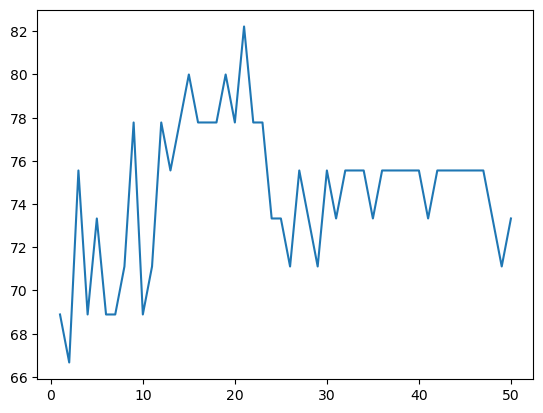

In [43]:
plt.plot(k_values,acc)